![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [121]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    assert f(a)*f(b) < 0
    pts = [a,b]
    

    while abs(b-a) > xtol and abs(f((a+b)/2)) > ytol:
        m = (a+b)/2
        if f(a)*f(m) < 0:
            b = m
        else:
            a = m
        pts.append(m)
    
    return pts

In [122]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    
    pts = [x]
    for i in range(maxiter):
        x = x - f(x)/df(x)
        pts.append(x)
        if abs(f(x)) < ytol or abs(x - pts[-2]) < xtol:
            break
    return pts

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [123]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x+h) - f(x-h))/(2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (df_central(f, x+h) - df_central(f, x-h))/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

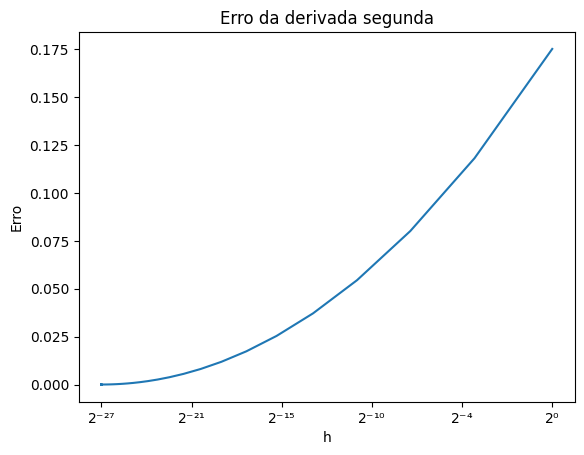

In [124]:
hs = np.logspace(-27,0,base=2, num=100)
plt.plot(hs, ddf_central(np.exp, 0, hs) - np.exp(0))

plt.title("Erro da derivada segunda")
plt.xlabel("h")
plt.ylabel("Erro")
plt.xticks(
    ticks=[n/10 for n in range(0,11,2)],
    labels=["$2⁻²⁷$", "$2⁻²¹$", "$2⁻¹⁵$", "$2⁻¹⁰$", "$2⁻⁴$", "$2⁰$"]
)


ax = plt.gca()

In [125]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

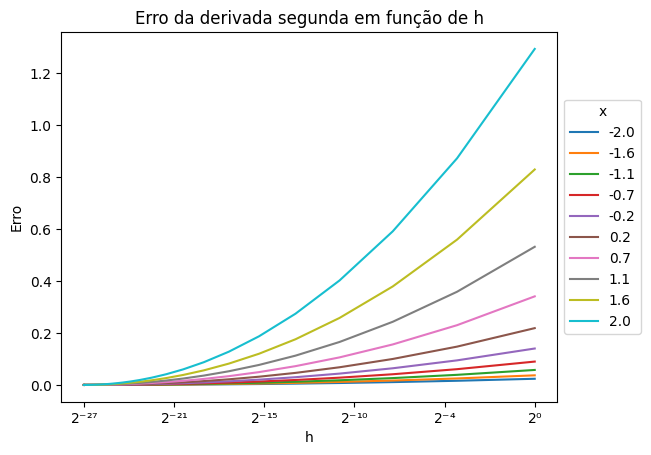

In [126]:
hs = np.logspace(-27,0,base=2, num=100)

for x in np.linspace(-2, 2, 10):
    plt.plot(hs, abs(df_central(np.exp,x,hs) - np.exp(x)), label= round(x,1))


plt.title("Erro da derivada segunda em função de h")
plt.xlabel("h")
plt.ylabel("Erro")
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
plt.xticks(
    ticks=[n/10 for n in range(0,11,2)],
    labels=["$2⁻²⁷$", "$2⁻²¹$", "$2⁻¹⁵$", "$2⁻¹⁰$", "$2⁻⁴$", "$2⁰$"]
)

ax = plt.gca()

In [127]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Comente.

É possível perceber que ao reduzir o passo h também se reduz o erro. Isso ocorre pois a função cresce mais rápido para valores positivos.

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [128]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [129]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, 1e-3)

def g3(x):
    return df_central(f, x, 1e-5)

In [130]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

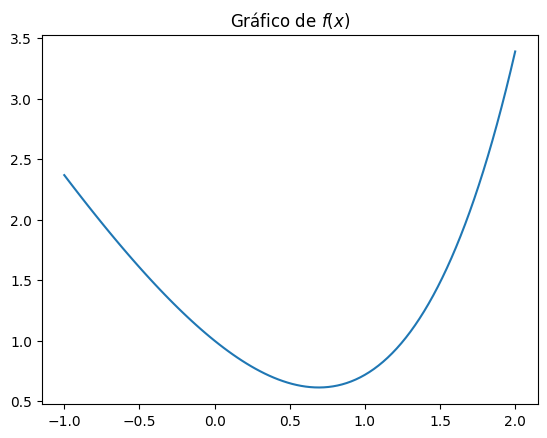

In [131]:
xs = np.linspace(-1, 2, 100)
plt.plot(xs, f(xs), label="$f(x)$")
plt.title("Gráfico de $f(x)$")

ax = plt.gca()

In [132]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

0 e 2. Como podemos observar existe um mínimo local ali, indicando a presença de um ponto em que a derivada é nula.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

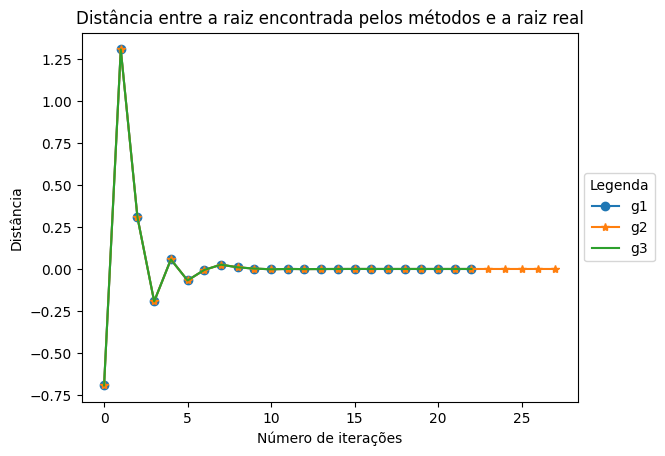

In [133]:
a, b = 0 , 2

g1ys = bissecao_pts(g1, a, b)
plt.plot(range(len(g1ys)), g1ys - np.log(2), label="g1", marker='o')
g2ys = bissecao_pts(g2, a, b)
plt.plot(range(len(g2ys)), g2ys - np.log(2), label="g2", marker='*')
g3ys = bissecao_pts(g3, a, b)
plt.plot(range(len(g3ys)), g3ys - np.log(2), label="g3")

plt.title("Distância entre a raiz encontrada pelos métodos e a raiz real")
plt.xlabel("Número de iterações")
plt.ylabel("Distância")
plt.legend(title="Legenda", bbox_to_anchor=(1,0.5), loc="center left")


ax = plt.gca()

In [134]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Ao observar o gráfico percebemos que as 3 funções tiveram seus resultados parecidos, diferindo apenas no número de interações. Isso ocorre devido a similaridade da precisão das funções. A diferença de iterações com g2 se deve ao fato desta ter um valor maior para o passo h.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [135]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f,x)

In [136]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

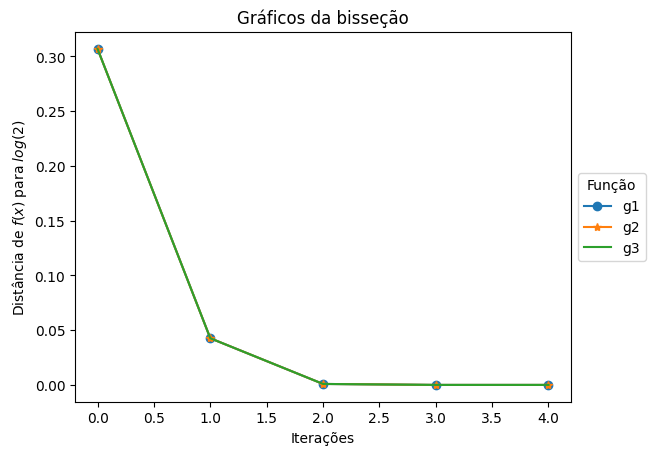

In [137]:
nt1 = newton_pts(g1, h1, 1)
nt2 = newton_pts(g2, h2, 1)
nt3 = newton_pts(g3, h2, 1)

plt.plot(range(len(nt1)), nt1 - np.log(2), label="g1", marker='o')
plt.plot(range(len(nt2)), nt2 - np.log(2), label="g2", marker='*')
plt.plot(range(len(nt3)), nt3 - np.log(2), label="g3")

plt.title("Gráficos da bisseção")
plt.xlabel("Iterações")
plt.ylabel("Distância de $f(x)$ para $log(2)$")

plt.legend(title="Função", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [138]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

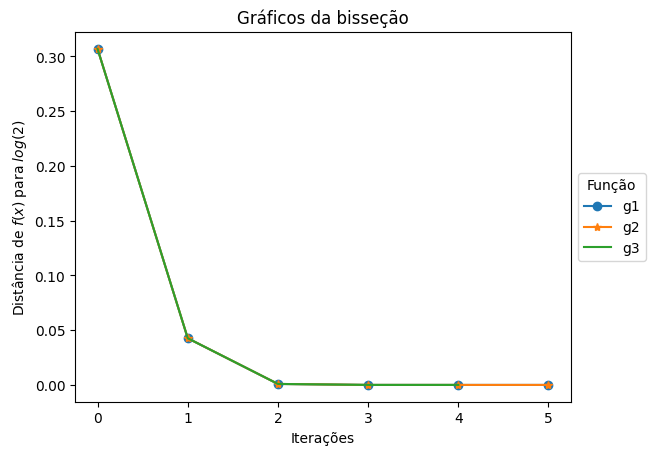

In [139]:
nt1 = newton_pts(g1, h1, 1, xtol=1e-15, ytol=1e-15)
nt2 = newton_pts(g2, h2, 1, xtol=1e-15, ytol=1e-15)
nt3 = newton_pts(g3, h2, 1, xtol=1e-15, ytol=1e-15)

plt.plot(range(len(nt1)), nt1 - np.log(2), label="g1", marker='o')
plt.plot(range(len(nt2)), nt2 - np.log(2), label="g2", marker='*')
plt.plot(range(len(nt3)), nt3 - np.log(2), label="g3")

plt.title("Gráficos da bisseção")
plt.xlabel("Iterações")
plt.ylabel("Distância de $f(x)$ para $log(2)$")

plt.legend(title="Função", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

- Quais você observa?
  - A função g3 chega primeiro a raiz
  - A função g1 e g2 demoram mais um passo pra chegar a raiz
- Como você as explica?
  - Isso ocorre em ambas devido a diminuição da tolerância.

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

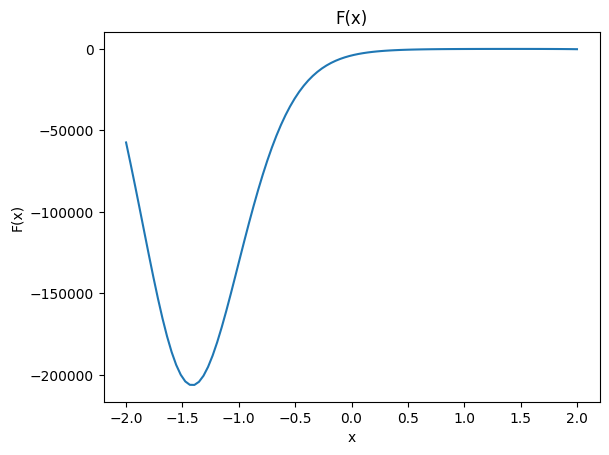

In [140]:
def f(x):
  return np.exp(x**2 - 2*x + 1) - 2**(x**3 - 6*x + 12)

xs = np.linspace(-2, 2, 100)

plt.plot(xs, f(xs))
plt.title("F(x)")
plt.xlabel("x")
plt.ylabel("F(x)")

ax = plt.gca()

In [141]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [142]:
def g1(x):
     return 2*np.exp((x-1)**2)*(-1 + x) - 3*np.exp2(x**3 - 6*x + 12)*(x**2 - 2)*np.log(2)

In [143]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [144]:
bis = bissecao_pts(g1, -3, -1, 1e-15, 1e-15)
raiz = bis[-1]
print(raiz) 

-1.4128724032031075


Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [145]:
tuples = [(x, f(x)) for x in bis]
min_pts = min(tuples, key=lambda i: i[1])
print(min_pts[0])


-1.4128724038600922


Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [146]:
print(np.sqrt(np.power(bis[-1] - min_pts[0], 2) + np.power(f(bis[-1]) - min_pts[1], 2)))

7.185625763564264e-10


O que você acha que aconteceu?

Não sei

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

3.601599019020796e-10


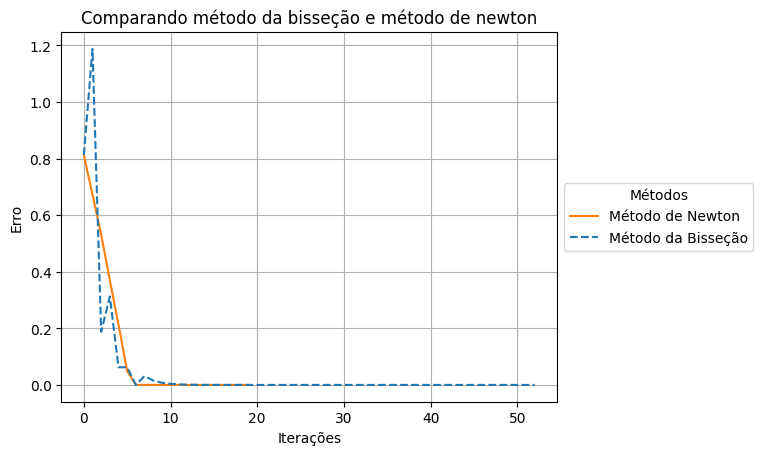

In [147]:
def f(x):
  return np.exp(x**2 - 2*x + 1) - 2**(x**3 - 6*x + 12)

def g1(x):
  return df_central(f, x, 1e-15)

raiz = -2.1874692
raiz = -2.18746944387928

print(f(raiz))

n_ys = [abs(raiz - i) for i in newton_pts(f, g1, -3, 1e-15, 1e-15)]
bi_ys = [abs(raiz - i) for i in bissecao_pts(f, -3, -1, 1e-15, 1e-15)]

plt.plot(range(len(n_ys)), n_ys, label="Método de Newton", color="C1")
plt.plot(range(len(bi_ys)), bi_ys, label="Método da Bisseção", color="C0", linestyle='dashed')

plt.title("Comparando método da bisseção e método de newton")
plt.xlabel("Iterações")
plt.ylabel("Erro")

plt.legend(title="Métodos", bbox_to_anchor=(1,0.5), loc="center left")

plt.grid()
ax = plt.gca()

In [148]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [149]:
for l in ax.lines:
    ys = l.get_ydata()
    print(min(abs(ys)))
    assert min(abs(ys)) < 1e-8

0.0
0.0
